In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [9]:
def smooth_conv(x,window_len=11,window='flat'):

    if x.ndim != 1:
        raise ValueError ("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError ("Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError ("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[int((window_len-1)/2):-int((window_len-1)/2+1)]


In [132]:
file = '/media/hydroassist/volvoxSSD/20190922/R_s_c_pvp025_1.npz'
data = np.load(file)

In [133]:
rightidxall = data['rightidxall']
leftidxall = data['leftidxall']

In [134]:
JamL = rightidxall-leftidxall

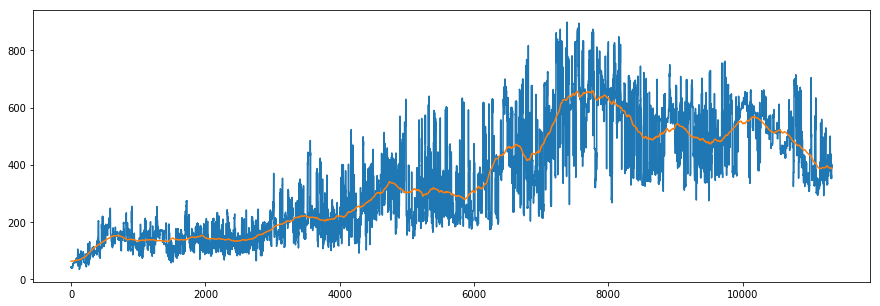

In [135]:
if np.nonzero(JamL)[0].shape[0]>5:
    plt.figure(figsize=(15,5))
    smoothJamL = smooth_conv(np.array(JamL),window_len=500,window='flat')
    plt.plot(JamL)
    plt.plot(smoothJamL)
    plt.show()

In [103]:
%%script false
from scipy import stats
t1 = 1000
t2 = 4000
fps = 25
scalebar = 1/150 # 1mm = 108 pixel
td = t2-t1
partL = 25
distance = partL*scalebar
fitdata = smoothJamL[t1:t2]
timedata = np.linspace(t1,t2,num=td)

plt.figure(figsize=(15,5))
z = np.polyfit(timedata, fitdata, 2)
p = np.poly1d(z)
plt.plot(timedata, fitdata, '.', timedata, p(timedata), '-')
locs, labels = plt.xticks()
plt.xticks(locs,locs/fps, fontsize=20)
plt.xlabel('time (s)', fontsize=24)
locs, labels = plt.yticks()
plt.yticks(locs,np.around(locs*distance, decimals=2) , fontsize=20)
plt.ylabel('jamming length (mm)', fontsize=24)
plt.savefig(file[:-4] + '_jamming.png', bbox_inches='tight')
plt.show()

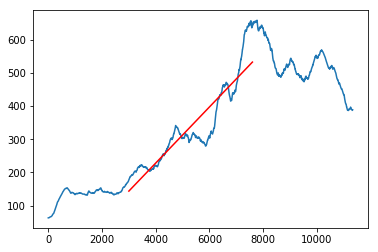

jamming speed =  0.08451092620935122  25pixel/frame
jamming speed =  0.3521288592056301  mm/s


In [140]:
from scipy import stats
t1 = 3000
t2 = 7600  #len(smoothJamL)
fps = 25
scalebar = 1/150 # 1mm = 108 pixel
td = t2-t1
partL = 25
distance = partL*scalebar
fitdata = smoothJamL[t1:t2]
timedata = np.linspace(t1,t2,num=td)
slope, intercept, r_value, p_value, std_err = stats.linregress(timedata,fitdata)
plt.plot(smoothJamL)
plt.plot(timedata, intercept + slope*(timedata), 'r', label='fitted line')
plt.show()
print('jamming speed = ',slope,' 25pixel/frame')
print('jamming speed = ',slope*partL*fps*scalebar,' mm/s')

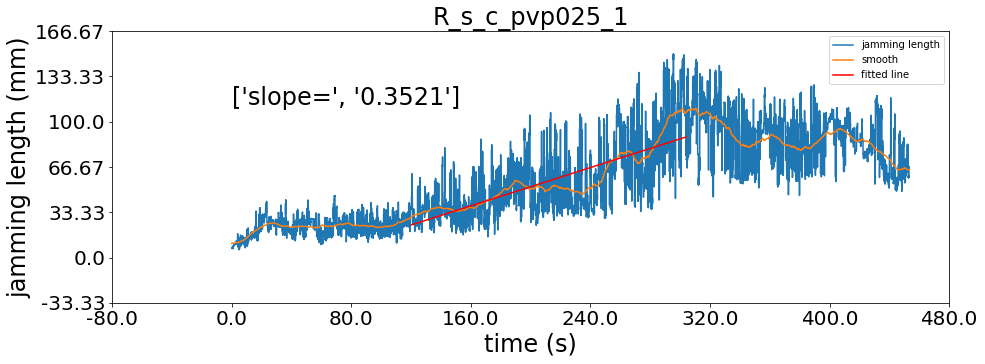

In [141]:
plt.figure(figsize=(15,5))

plt.plot(JamL, label='jamming length')
plt.plot(smoothJamL,label='smooth')
plt.plot(timedata, intercept + slope*(timedata), 'r', label='fitted line')
plt.text(0, np.max(JamL)-np.max(JamL)/4, ['slope=',str(slope*partL*fps*scalebar)[:6]], fontsize=24)
plt.title(file.split('/')[-1][:-4], fontsize=24)
plt.legend()
locs, labels = plt.xticks()
plt.xticks(locs,locs/fps, fontsize=20)
plt.xlabel('time (s)', fontsize=24)
locs, labels = plt.yticks()
plt.yticks(locs,np.around(locs*distance, decimals=2) , fontsize=20)
plt.ylabel('jamming length (mm)', fontsize=24)
plt.savefig(file[:-4] + '_jamming.png', bbox_inches='tight')
plt.show()